<a href="https://colab.research.google.com/github/laoktaviana/ACS-UAS/blob/main/Decision%20Tree%20-%20kddcup99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Koneksi ke file Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
cd /content/drive/My Drive/Security

/content/drive/My Drive/Security


In [ ]:
#dilakukan proses import library terlebih dahulu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('kddcup99.csv')
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [ ]:
def create_unique_dict(colname):
    values = df[colname].unique()
    values_dict = {}
    for i in range(len(values)):
        values_dict[values[i]] = i
    return values_dict

In [ ]:
df['protocol_type'] = df['protocol_type'].replace(create_unique_dict('protocol_type'))

In [ ]:
df['service'] = df['service'].replace(create_unique_dict('service'))

In [ ]:
df['flag'] = df['flag'].replace(create_unique_dict('flag'))


In [ ]:
df['label'] = df['label'].replace(create_unique_dict('label'))

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,0,0,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,0,0,0,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,0,0,0,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,0,0,0,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,0,0,0,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,493980,493981,493982,493983,493984,493985,493986,493987,493988,493989,493990,493991,493992,493993,493994,493995,493996,493997,493998,493999,494000,494001,494002,494003,494004,494005,494006,494007,494008,494009,494010,494011,494012,494013,494014,494015,494016,494017,494018,494019
duration,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
protocol_type,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
service,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
flag,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
src_bytes,181.00,239.00,235.00,219.00,217.00,217.00,212.00,159.00,210.00,212.00,210.00,177.00,222.00,256.00,241.00,260.00,241.00,257.00,233.00,233.00,256.00,234.00,241.00,239.00,245.00,248.00,354.00,193.00,214.00,212.00,215.00,217.00,205.00,155.00,202.00,235.00,259.00,301.00,322.00,370.00,...,326.00,334.00,331.00,333.00,197.00,197.00,215.00,214.00,297.00,296.00,296.00,294.00,285.00,316.00,335.00,284.00,242.00,223.00,204.00,148.00,0.00,215.00,341.00,341.00,341.00,235.00,320.00,319.00,335.00,291.00,308.00,291.00,289.00,306.00,289.00,310.00,282.00,203.00,291.00,219.00
dst_bytes,5450.00,486.00,1337.00,1337.00,2032.00,2032.00,1940.00,4087.00,151.00,786.00,624.00,1985.00,773.00,1169.00,259.00,1837.00,261.00,818.00,255.00,504.00,1273.00,255.00,259.00,968.00,1919.00,2129.00,1752.00,3991.00,14959.00,1309.00,3670.00,18434.00,424.00,424.00,424.00,6627.00,3917.00,2653.00,424.00,520.00,...,4660.00,2684.00,1417.00,35187.00,1571.00,13802.00,2941.00,3687.00,599.00,540.00,617.00,29288.00,34557.00,3665.00,10440.00,10592.00,7066.00,3707.00,1731.00,1122.00,0.00,2649.00,326.00,1943.00,1663.00,501.00,13828.00,1435.00,3435.00,236.00,662.00,1862.00,244.00,662.00,1862.00,1881.00,2286.00,1200.00,1200.00,1234.00
land,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
wrong_fragment,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,

In [ ]:
cols = df.columns
for i in range(len(cols)):
    if len(df[cols[i]].unique()) < 2:
        print(cols[i])

lnum_outbound_cmds
is_host_login


In [ ]:
df = df.drop(['lnum_outbound_cmds', 'is_host_login'], axis=1)

In [ ]:
corr = df.corr()
corr

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
duration,1.000000,-0.023715,0.027184,-0.006068,0.004258,0.005440,-0.000452,-0.003235,0.003786,0.013213,0.005239,-0.017265,0.058095,0.021340,0.055853,0.056766,0.074562,-0.000169,0.025661,0.023424,-0.105154,-0.080250,-0.031416,-0.031378,0.012053,0.012106,0.021771,0.051800,-0.011790,0.010073,-0.117516,-0.118458,0.406233,0.042642,-0.006983,-0.030400,-0.030612,0.006739,0.010465,-0.077989
protocol_type,-0.023715,1.000000,0.167665,-0.655335,-0.002664,-0.032433,-0.008262,-0.005357,-0.003183,-0.054640,-0.012110,-0.516476,-0.007030,-0.013063,-0.005788,-0.006982,-0.013905,-0.012280,-0.034208,-0.046131,0.887492,0.966840,-0.574149,-0.573835,-0.306954,-0.307803,0.657082,-0.277028,-0.197989,0.385532,0.711420,0.692294,-0.260155,0.956481,-0.117591,-0.574553,-0.573441,-0.309226,-0.308834,0.493818
service,0.027184,0.167665,1.000000,0.349884,-0.001548,-0.025936,-0.008394,0.023454,0.002456,-0.034878,-0.006646,-0.628047,-0.006229,-0.009203,-0.003607,0.000318,-0.007551,0.005828,-0.039942,-0.017934,0.300152,0.137738,0.334619,0.334046,0.061855,0.059387,-0.391065,0.187517,-0.288361,0.471973,-0.356147,-0.389437,0.127602,0.127535,-0.173735,0.334509,0.334998,0.059592,0.061794,0.409206
flag,-0.006068,-0.655335,0.349884,1.000000,0.003872,-0.013470,0.013371,-0.025261,-0.001361,-0.021159,0.020260,-0.216361,-0.002809,-0.005586,-0.002475,-0.002985,-0.005095,-0.005251,-0.014451,-0.019484,-0.372189,-0.606885,0.928661,0.929011,0.219479,0.216122,-0.925664,0.314960,-0.082986,0.124740,-0.859188,-0.879537,0.256300,-0.635475,-0.029200,0.928322,0.928892,0.210140,0.211055,0.038440
src_bytes,0.004258,-0.002664,-0.001548,0.003872,1.000000,-0.000002,-0.000020,-0.000139,-0.000005,0.004483,-0.000027,0.001701,0.000119,-0.000022,-0.000010,-0.000010,0.000013,0.000005,-0.000052,-0.000082,-0.003098,-0.002501,0.001558,0.001114,0.000591,0.001379,-0.001860,0.006207,-0.000015,-0.001743,-0.003212,-0.002052,0.000578,-0.000724,0.001186,-0.000718,0.001122,-0.000393,0.001328,0.008340
dst_bytes,0.005440,-0.032433,-0.025936,-0.013470,-0.000002,1.000000,-0.000175,-0.001254,0.016288,0.004365,0.049330,0.047814,0.023298,0.031680,0.075656,0.020746,0.004958,0.000144,0.008746,0.001289,-0.040373,-0.030544,-0.011908,-0.011930,-0.006166,-0.005808,0.014002,-0.005702,0.008135,-0.048869,-0.005849,0.007058,-0.005314,-0.020143,0.008707,-0.011334,-0.011235,-0.005000,-0.005471,0.002452
land,-0.000452,-0.008262,-0.008394,0.013371,-0.000020,-0.000175,1.000000,-0.000318,-0.000017,-0.000295,-0.000065,-0.002784,-0.000038,-0.000070,-0.000031,-0.000038,-0.000075,-0.000066,-0.000184,-0.000249,-0.010260,-0.007886,0.013898,0.014422,-0.000777,-0.001659,0.002286,0.002282,0.036985,-0.023671,-0.011587,0.001984,-0.000333,0.003799,0.083320,0.012658,0.007795,-0.001511,-0.001665,0.019074
wrong_fragment,-0.003235,-0.005357,0.023454,-0.025261,-0.000139,-0.001254,-0.000318,1.000000,-0.000123,-0.002106,-0.000467,-0.019908,-0.000271,-0.000504,-0.000223,-0.000269,-0.000536,-0.000473,-0.001319,-0.001778,-0.061935,-0.047789,-0.013969,-0.022119,-0.011529,-0.011865,0.017416,-0.007077,0.000153,-0.005191,-0.058624,-0.054903,0.071857,-0.031803,0.012092,-0.019091,-0.022104,0.029774,-0.011904,0.082780
urgent,0.003786,-0.003183,0.002456,-0.001361,-0.000005,0.016288,-0.000017,-0.000123,1.000000,0.000356,0.141996,0.006164,0.014285,0.034790,-0.000012,0.009476,0.015211,-0.000026,0.020068,-0.000096,-0.003997,-0.003047,-0.001193,-0.001192,-0.000638,-0.000639,0.001381,-0.0

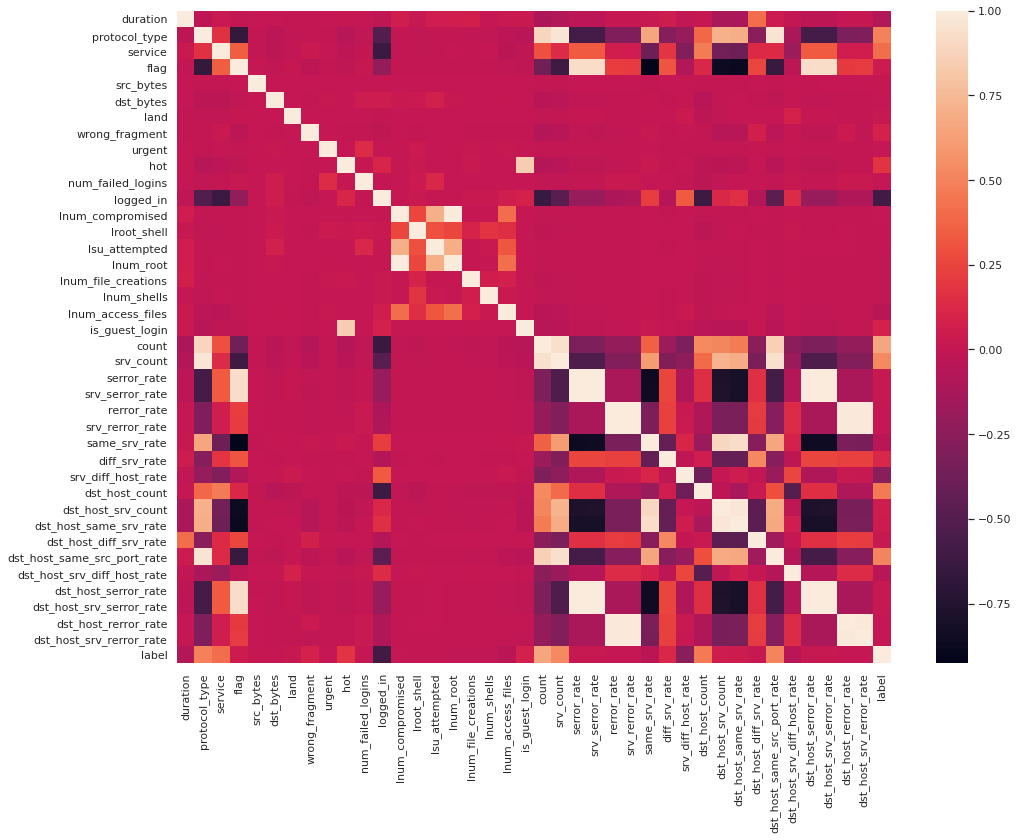

In [ ]:
sb.set(rc={'figure.figsize':(16, 12)})
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [ ]:
removable_columns = []
for i in range(len(corr)):
    for j in range(len(corr)):
        if i != j and corr.iloc[i, j] > 0.99:
            print(corr.index[i], corr.columns[j])
            removable_columns.append(corr.columns[j])

lnum_compromised lnum_root
lnum_root lnum_compromised
serror_rate srv_serror_rate
serror_rate dst_host_serror_rate
serror_rate dst_host_srv_serror_rate
srv_serror_rate serror_rate
srv_serror_rate dst_host_serror_rate
srv_serror_rate dst_host_srv_serror_rate
rerror_rate srv_rerror_rate
srv_rerror_rate rerror_rate
dst_host_serror_rate serror_rate
dst_host_serror_rate srv_serror_rate
dst_host_serror_rate dst_host_srv_serror_rate
dst_host_srv_serror_rate serror_rate
dst_host_srv_serror_rate srv_serror_rate
dst_host_srv_serror_rate dst_host_serror_rate


In [ ]:
removable_columns

['lnum_root',
 'lnum_compromised',
 'srv_serror_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'serror_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'srv_rerror_rate',
 'rerror_rate',
 'serror_rate',
 'srv_serror_rate',
 'dst_host_srv_serror_rate',
 'serror_rate',
 'srv_serror_rate',
 'dst_host_serror_rate']

In [ ]:
df = df.drop(removable_columns, axis=1)

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lroot_shell,lsu_attempted,lnum_file_creations,lnum_shells,lnum_access_files,is_guest_login,count,srv_count,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,0,0,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,8,8,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0
1,0,0,0,0,239,486,0,0,0,0,0,1,0,0,0,0,0,0,8,8,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0
2,0,0,0,0,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,8,8,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0
3,0,0,0,0,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,6,6,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0
4,0,0,0,0,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,6,6,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0


In [ ]:
X_data = df.drop(['label'], axis=1)
Y_data = df['label']

In [ ]:
#Dilakukan standarisasi data
scaler = StandardScaler()
X_data_scaled = scaler.fit_transform(X_data)

In [ ]:
#dilakukan reduksi menggunakan metode PCA
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X_data_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['p_component_' + str(i) for i in range(20)])

In [ ]:
principalDf.head()

,p_component_0,p_component_1,p_component_2,p_component_3,p_component_4,p_component_5,p_component_6,p_component_7,p_component_8,p_component_9,p_component_10,p_component_11,p_component_12,p_component_13,p_component_14,p_component_15,p_component_16,p_component_17,p_component_18,p_component_19
0,1.887553,4.184033,0.076745,-0.661729,-0.111031,-0.164920,0.068960,-0.509885,0.307415,-0.021928,0.005789,-0.163081,-0.003624,0.379849,-0.272318,0.169115,0.267454,-1.116542,0.132918,0.805417
1,1.884325,4.150105,0.094255,-0.685465,-0.134116,-0.148325,0.024242,-0.540764,0.331032,-0.016829,0.002040,-0.027967,-0.050281,0.422560,-0.311770,0.158504,0.280159,-1.088260,0.143952,0.767319
2,1.854099,4.110431,0.108523,-0.699171,-0.132937,-0.135220,0.026064,-0.578868,0.339357,-0.016324,0.002007,-0.043938,-0.039139,0.459997,-0.308828,0.155239,0.277324,-1.056167,0.140213,0.721016
3,1.815277,4.068062,0.120644,-0.708371,-0.132961,-0.129127,0.021656,-0.611635,0.348245,-0.014776,0.001448,-0.038881,-0.037429,0.494196,-0.311378,0.151627,0.276014,-1.026036,0.137719,0.675740
4,1.777998,4.025317,0.133690,-0.719250,-0.131430,-0.118815,0.022465,-0.647475,0.356154,-0.013743,0.001321,-0.051290,-0.028304,0.529859,-0.308967,0.148104,0.273247,-0.994411,0.134015,0.628786


In [ ]:
#Pembagian Data Test dan Data Train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(principalDf, Y_data, test_size=0.2, random_state=0, shuffle=True)

In [ ]:
#Dilakukan klasifikasi dengan Decision Tree Classifier.
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
predictions = tree.predict(X_test)
predictions

array([0, 0, 5, ..., 0, 5, 0])

In [ ]:
#Prediksi Akurasi
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9990587425610299

In [ ]:
#Dilakukan klasifikasi dengan Random Forest Classifier.
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_predictions = model.predict(X_test)
rf_predictions

array([0, 0, 5, ..., 0, 5, 0])

In [ ]:
#Prediksi Akurasi
accuracy_score(y_test, rf_predictions)

0.9994838265657261